In [1]:
%matplotlib inline
from sys import path
path.append('/home/rui/blacksid/mew-p')
DATA_PATH = '/home/rui/blacksid/data/dockfuture'
import numpy as np
import pytz
from datetime import datetime
from datetime import timedelta
import cProfile
import matplotlib.pyplot as plt
from mewp.data.item import Contract
from mewp.simulate.wrapper import TrendAlgoWrapper
from mewp.simulate.runner import SingleRunner
import pandas as pd
from mewp.util.clock import Clock
from mewp.util.candle import Candle
from mewp.util.candle import CandleCreator
from mewp.util.candle import CandleAnalysis

In [2]:
product = 'zn'
data = pd.read_csv('/home/rui/blacksid/data/adjusted_5min/{}0.csv'.format(product.upper()))

In [3]:
data

,datetime,BasisSpread,ClosingPx,HighPx,LimitDown,LimitUp,LowPx,OpenInterest,OpeningPx,TotalTurnover,TotalVolumeTraded,TradingDate,adjust
0,2010-01-04 09:04:00,NaN,21380.0,21490.0,NaN,NaN,21360.0,152616.0,21405.0,1.684643e+09,15726.0,2010-01-04,4360.0
1,2010-01-04 09:09:00,NaN,21290.0,21380.0,NaN,NaN,21290.0,153226.0,21380.0,1.432217e+09,13428.0,2010-01-04,4360.0
2,2010-01-04 09:14:00,NaN,21320.0,21320.0,NaN,NaN,21255.0,153438.0,21290.0,1.134708e+09,10658.0,2010-01-04,4360.0
3,2010-01-04 09:19:00,NaN,21320.0,21325.0,NaN,NaN,21250.0,154150.0,21315.0,7.196084e+08,6760.0,2010-01-04,4360.0
4,2010-01-04 09:24:00,NaN,21375.0,21380.0,NaN,NaN,21305.0,154718.0,21325.0,1.443910e+09,13530.0,2010-01-04,4360.0
5,2010-01-04 09:29:00,NaN,21440.0,21445.0,NaN,NaN,21365.0,158478.0,21380.0,1.674028e+09,15642.0,2010-01-04,4360.0
6,2010-01-04 09:34:00,NaN,21430.0,21475.0,NaN,NaN,21420.0,159740.0,21440.0,1.488003e+09,13878.0,2010-01-04,4360.0
7,2010-01-04 09:39:00,NaN,21385.0,21445.0,NaN,NaN,21375.0,157926.0,21425.0,1.080075e+09,10092.0,2010-01-04,4360.0
8,2010-01-04 09:44:00,NaN,21430.0,21445.0,NaN,NaN,21380.0,158256.0,21380.0,6.317356e+08,5900.0,2010-01-04,4360.0
9,2010-01-04 09:49:00,NaN,21415.0,21440.0,NaN,NaN,21375.0,159316.0,21435.0,6.987478e+08,6530.0,2010-01-04,4360.0


In [4]:
time2 = datetime.strptime('2010-01-04 09:04:00', '%Y-%m-%d %H:%M:%S')
mins_5 = timedelta(seconds= 5*60)
time1 = time2 - mins_5

In [5]:
time1

datetime.datetime(2010, 1, 4, 8, 59)

In [6]:
product = 'zn'
data = pd.read_csv('/home/rui/blacksid/data/adjusted_5min/{}0.csv'.format(product.upper()))
candles = []
mins_5 = timedelta(seconds= 5*60)
for row in data.iterrows():
    if row[1].TotalVolumeTraded < 0.1:
        continue
    time2 = datetime.strptime(row[1].datetime, '%Y-%m-%d %H:%M:%S')
    time1 = time2 - mins_5
    start_time = int((time1 - datetime(1970, 1, 1)).total_seconds() * 1000)
    end_time = int((time2 - datetime(1970, 1, 1)).total_seconds() * 1000)
    adjust = row[1].adjust
    day_info = {}
    day_info['HighPrice'] = row[1].HighPx + adjust
    day_info['LowPrice'] = row[1].LowPx + adjust
    day_info['OpenPrice'] = row[1].OpeningPx + adjust
    day_info['ClosePrice'] = row[1].ClosingPx + adjust
    day_info['Volume'] = row[1].TotalVolumeTraded
    day_info['SettlePrice'] = row[1].TotalTurnover/row[1].TotalVolumeTraded + adjust   # vwap
    day_info['Position'] = 0
    day_info['LastPosition'] = 0
    temp_candle = Candle(day_info, start_time, end_time)
    candles.append(temp_candle)

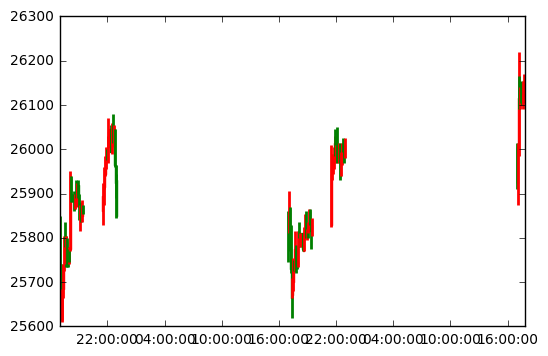

In [7]:
%matplotlib inline
for candle in candles[:100]:
    candle.plot_candle()

In [8]:
class AlgoBase(object):
    def __init__(self, product):
        self.contract = Contract(product)
        self.pos = 0
        self.cash = 0
        self._pre_day = None
        self._pre_pnl = 0
        self.daily_checkpoint = {'day':[], 'pnl':[]}
        self.pnl_history = []
    
    def _long(self, qty, price):
        self.pos += qty
        self.cash -= qty * price * self.contract.units
        self.cash -= qty * price * self.contract.units * self.contract.fee_peramount
        self.cash -= qty * self.contract.fee_perhand        
    
    def _short(self, qty, price):
        self.pos -= qty
        self.cash += qty * price * self.contract.units
        self.cash -= qty * price * self.contract.units * self.contract.fee_peramount
        self.cash -= qty * self.contract.fee_perhand
    
    def _order_to(self, qty, price):
        if qty == self.pos:
            return
        elif qty>self.pos:
            self._long(qty-self.pos, price)
        else:
            self._short(self.pos - qty, price)
            
    def on_candle(self, candle, next_open_price):
        pass
    
    def pnl_checkpoint(self, pnl, date_time):
        if self._pre_day == None:
            self.daily_checkpoint['day'].append(date_time.date().strftime("%Y-%m-%d"))
            self.daily_checkpoint['pnl'].append(pnl)
            self._pre_day = date_time.date()
            self._pre_pnl = pnl
        elif date_time.date() == self._pre_day:
            return
        else:
            self.daily_checkpoint['day'].append(date_time.date().strftime("%Y-%m-%d"))
            self.daily_checkpoint['pnl'].append(pnl-self._pre_pnl)
            self._pre_day = date_time.date()
            self._pre_pnl = pnl

In [9]:
class ATR(object):
    ## Constructor
    # @param alpha for ema
    def __init__(self, alpha):
        self.alpha = alpha
        # computed
        self.mean = 0
        
    ## add a new observation, and refresh
    def add(self, observe):
        if (self.mean == 0):
            self.mean = observe
        else:
            self.mean = self.mean + self.alpha * (observe - self.mean)

class MACross(AlgoBase):
    def __init__(self, product, param):
        super(MACross, self).__init__(product)
        self.pre_close_price = []
        self.param = param
        self.atr = ATR(self.param['alpha'])
        self.trade_day_list = []
        self.window = max(self.param['ma2'], self.param['filter2'])
        self.pre_cross = None
        self.pre_high = None
        self.pre_low = None
        
    
#     def buy_filter(self):
#         if np.mean(self.pre_close_price[-self.param['filter1']:]) >\
#             np.mean(self.pre_close_price[-self.param['filter2']:]):
#             return True
#         else:
#             return False
    
#     def sell_filter(self):
#         if np.mean(self.pre_close_price[-self.param['filter1']:]) <\
#             np.mean(self.pre_close_price[-self.param['filter2']:]):
#             return True
#         else:
#             return False
    
    def buy_filter(self):
        return True
    def sell_filter(self):
        return True
    
    def on_candle(self, candle):
        date_time = datetime.fromtimestamp(candle.start_time/1000)
        self.pre_close_price.append(candle.close_price)
        if len(self.pre_close_price) > 1:
            TR = max(self.pre_close_price[-2], candle.high) - min(self.pre_close_price[-2], candle.low)
            self.atr.add(TR)
        if len(self.pre_close_price) < self.window:
            self.pnl_history.append(0)
            return
        if self.pre_cross == None:
            if np.mean(self.pre_close_price[-self.param['ma1']:]) >\
                np.mean(self.pre_close_price[-self.param['ma2']:]):
                self.pre_cross = 1
            else:
                self.pre_cross = -1
            self.pnl_history.append(0)
            return
        
        if np.mean(self.pre_close_price[-self.param['ma1']:]) >\
                np.mean(self.pre_close_price[-self.param['ma2']:]):
            cross = 1
        else:
            cross = -1

        if cross == 1 and self.pre_cross == -1 and self.buy_filter():
                self._order_to(self.param['hands'], candle.close_price)
                self.pre_high = candle.close_price
        elif cross == -1 and self.pre_cross == 1 and self.sell_filter():
                self._order_to(-self.param['hands'], candle.close_price)
                self.pre_low = candle.close_price
        # stop_loss 
        if self.pos > 0:
            assert(self.pre_high!=None)
            if candle.close_price > self.pre_high:
                self.pre_high = candle.close_price
            diff = self.pre_high - candle.close_price
            assert(diff>=-1e-6)
            if diff > self.param['atr_stop_loss'] * self.atr.mean:
                self._order_to(0, candle.close_price)
                self.pre_high = None
            
        if self.pos < 0:
            assert(self.pre_low!=None)
            if candle.close_price < self.pre_low:
                self.pre_low = candle.close_price
            diff = candle.close_price - self.pre_low
            assert(diff>=-1e-6)
            if diff > self.param['atr_stop_loss'] * self.atr.mean:
                self._order_to(0, candle.close_price)
                self.pre_low = None
        self.pre_cross = cross
        pnl = self.pos * candle.close_price * self.contract.units + self.cash
        self.pnl_history.append(pnl)
        self.pnl_checkpoint(pnl, date_time)

In [10]:
param = {'ma1':10, 'ma2':100, 'filter1':100, 'filter2':200, 'atr_stop_loss': 10, 'alpha': 0.05, 'hands': 1}

In [11]:
cuAccount = MACross('zn',param)

In [12]:
for i in range(len(candles)-1):
    cuAccount.on_candle(candles[i])

In [13]:
cuAccount.pnl_history[-1]

37312.0

# zn: 100000

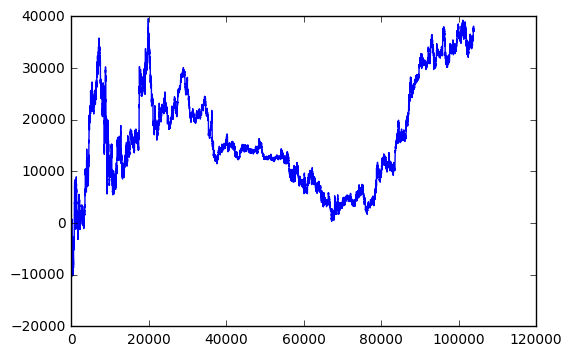

In [14]:
plt.plot(cuAccount.pnl_history)

# c: 15000 

1431.2


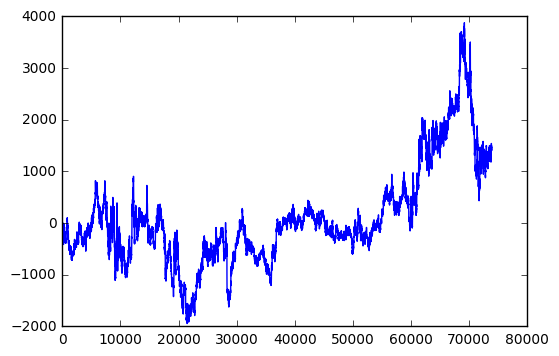

In [15]:
product = 'c'
data = pd.read_csv('/home/rui/blacksid/data/adjusted_5min/{}0.csv'.format(product.upper()))
candles = []
mins_5 = timedelta(seconds= 5*60)
for row in data.iterrows():
    if row[1].TotalVolumeTraded < 0.1:
        continue
    time2 = datetime.strptime(row[1].datetime, '%Y-%m-%d %H:%M:%S')
    time1 = time2 - mins_5
    start_time = int((time1 - datetime(1970, 1, 1)).total_seconds() * 1000)
    end_time = int((time2 - datetime(1970, 1, 1)).total_seconds() * 1000)
    adjust = row[1].adjust
    day_info = {}
    day_info['HighPrice'] = row[1].HighPx + adjust
    day_info['LowPrice'] = row[1].LowPx + adjust
    day_info['OpenPrice'] = row[1].OpeningPx + adjust
    day_info['ClosePrice'] = row[1].ClosingPx + adjust
    day_info['Volume'] = row[1].TotalVolumeTraded
    day_info['SettlePrice'] = row[1].TotalTurnover/row[1].TotalVolumeTraded + adjust   # vwap
    day_info['Position'] = 0
    day_info['LastPosition'] = 0
    temp_candle = Candle(day_info, start_time, end_time)
    candles.append(temp_candle)
param = {'ma1':10, 'ma2':100, 'filter1':50, 'filter2':100, 'atr_stop_loss': 10, 'alpha': 0.07, 'hands': 1}
cuAccount = MACross(product,param)
for i in range(len(candles)-1):
    cuAccount.on_candle(candles[i])
print cuAccount.pnl_history[-1]
plt.plot(cuAccount.pnl_history)

# au : 300000

273650.0


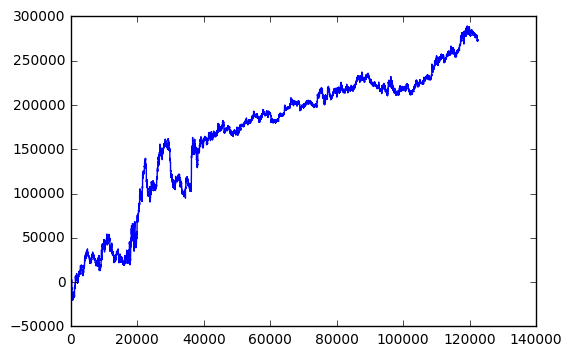

In [16]:
product = 'au'
data = pd.read_csv('/home/rui/blacksid/data/adjusted_5min/{}0.csv'.format(product.upper()))
candles = []
mins_5 = timedelta(seconds= 5*60)
for row in data.iterrows():
    if row[1].TotalVolumeTraded < 0.1:
        continue
    time2 = datetime.strptime(row[1].datetime, '%Y-%m-%d %H:%M:%S')
    time1 = time2 - mins_5
    start_time = int((time1 - datetime(1970, 1, 1)).total_seconds() * 1000)
    end_time = int((time2 - datetime(1970, 1, 1)).total_seconds() * 1000)
    adjust = row[1].adjust
    day_info = {}
    day_info['HighPrice'] = row[1].HighPx + adjust
    day_info['LowPrice'] = row[1].LowPx + adjust
    day_info['OpenPrice'] = row[1].OpeningPx + adjust
    day_info['ClosePrice'] = row[1].ClosingPx + adjust
    day_info['Volume'] = row[1].TotalVolumeTraded
    day_info['SettlePrice'] = row[1].TotalTurnover/row[1].TotalVolumeTraded + adjust   # vwap
    day_info['Position'] = 0
    day_info['LastPosition'] = 0
    temp_candle = Candle(day_info, start_time, end_time)
    candles.append(temp_candle)
param = {'ma1':10, 'ma2':100, 'filter1':50, 'filter2':100, 'atr_stop_loss': 10, 'alpha': 0.07, 'hands': 1}
cuAccount = MACross(product,param)
for i in range(len(candles)-1):
    cuAccount.on_candle(candles[i])
print cuAccount.pnl_history[-1]
plt.plot(cuAccount.pnl_history)

# cu : 18000

123678.45


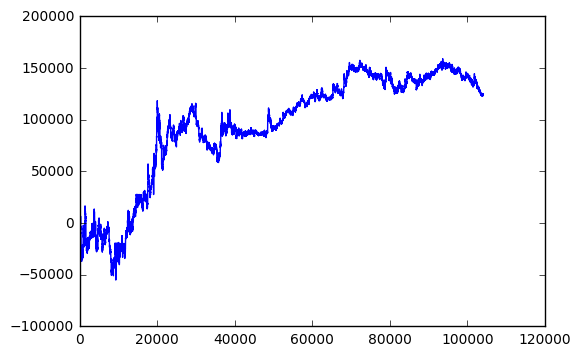

In [17]:
product = 'cu'
data = pd.read_csv('/home/rui/blacksid/data/adjusted_5min/{}0.csv'.format(product.upper()))
candles = []
mins_5 = timedelta(seconds= 5*60)
for row in data.iterrows():
    if row[1].TotalVolumeTraded < 0.1:
        continue
    time2 = datetime.strptime(row[1].datetime, '%Y-%m-%d %H:%M:%S')
    time1 = time2 - mins_5
    start_time = int((time1 - datetime(1970, 1, 1)).total_seconds() * 1000)
    end_time = int((time2 - datetime(1970, 1, 1)).total_seconds() * 1000)
    adjust = row[1].adjust
    day_info = {}
    day_info['HighPrice'] = row[1].HighPx + adjust
    day_info['LowPrice'] = row[1].LowPx + adjust
    day_info['OpenPrice'] = row[1].OpeningPx + adjust
    day_info['ClosePrice'] = row[1].ClosingPx + adjust
    day_info['Volume'] = row[1].TotalVolumeTraded
    day_info['SettlePrice'] = row[1].TotalTurnover/row[1].TotalVolumeTraded + adjust   # vwap
    day_info['Position'] = 0
    day_info['LastPosition'] = 0
    temp_candle = Candle(day_info, start_time, end_time)
    candles.append(temp_candle)
param = {'ma1':10, 'ma2':100, 'filter1':50, 'filter2':100, 'atr_stop_loss': 10, 'alpha': 0.07, 'hands': 1}
cuAccount = MACross(product,param)
for i in range(len(candles)-1):
    cuAccount.on_candle(candles[i])
print cuAccount.pnl_history[-1]
plt.plot(cuAccount.pnl_history)

# i : 40000

40612.539


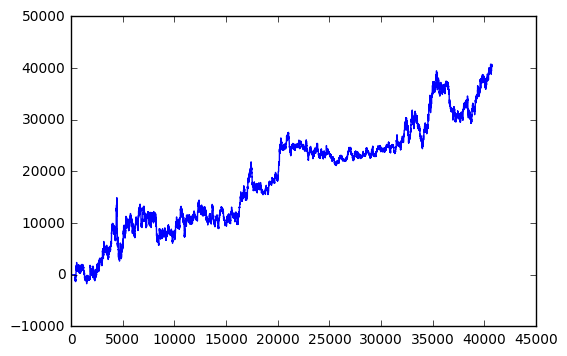

In [18]:
product = 'i'
data = pd.read_csv('/home/rui/blacksid/data/adjusted_5min/{}0.csv'.format(product.upper()))
candles = []
mins_5 = timedelta(seconds= 5*60)
for row in data.iterrows():
    if row[1].TotalVolumeTraded < 0.1:
        continue
    time2 = datetime.strptime(row[1].datetime, '%Y-%m-%d %H:%M:%S')
    time1 = time2 - mins_5
    start_time = int((time1 - datetime(1970, 1, 1)).total_seconds() * 1000)
    end_time = int((time2 - datetime(1970, 1, 1)).total_seconds() * 1000)
    adjust = row[1].adjust
    day_info = {}
    day_info['HighPrice'] = row[1].HighPx + adjust
    day_info['LowPrice'] = row[1].LowPx + adjust
    day_info['OpenPrice'] = row[1].OpeningPx + adjust
    day_info['ClosePrice'] = row[1].ClosingPx + adjust
    day_info['Volume'] = row[1].TotalVolumeTraded
    day_info['SettlePrice'] = row[1].TotalTurnover/row[1].TotalVolumeTraded + adjust   # vwap
    day_info['Position'] = 0
    day_info['LastPosition'] = 0
    temp_candle = Candle(day_info, start_time, end_time)
    candles.append(temp_candle)
param = {'ma1':10, 'ma2':100, 'filter1':50, 'filter2':100, 'atr_stop_loss': 10, 'alpha': 0.07, 'hands': 1}
cuAccount = MACross(product,param)
for i in range(len(candles)-1):
    cuAccount.on_candle(candles[i])
print cuAccount.pnl_history[-1]
plt.plot(cuAccount.pnl_history)

# m:20000

12191.5


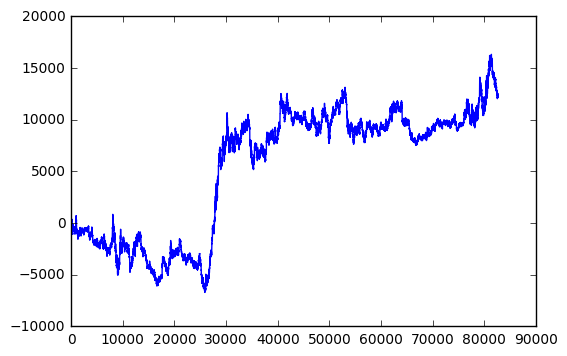

In [19]:
product = 'm'
data = pd.read_csv('/home/rui/blacksid/data/adjusted_5min/{}0.csv'.format(product.upper()))
candles = []
mins_5 = timedelta(seconds= 5*60)
for row in data.iterrows():
    if row[1].TotalVolumeTraded < 0.1:
        continue
    time2 = datetime.strptime(row[1].datetime, '%Y-%m-%d %H:%M:%S')
    time1 = time2 - mins_5
    start_time = int((time1 - datetime(1970, 1, 1)).total_seconds() * 1000)
    end_time = int((time2 - datetime(1970, 1, 1)).total_seconds() * 1000)
    adjust = row[1].adjust
    day_info = {}
    day_info['HighPrice'] = row[1].HighPx + adjust
    day_info['LowPrice'] = row[1].LowPx + adjust
    day_info['OpenPrice'] = row[1].OpeningPx + adjust
    day_info['ClosePrice'] = row[1].ClosingPx + adjust
    day_info['Volume'] = row[1].TotalVolumeTraded
    day_info['SettlePrice'] = row[1].TotalTurnover/row[1].TotalVolumeTraded + adjust   # vwap
    day_info['Position'] = 0
    day_info['LastPosition'] = 0
    temp_candle = Candle(day_info, start_time, end_time)
    candles.append(temp_candle)
param = {'ma1':10, 'ma2':100, 'filter1':50, 'filter2':100, 'atr_stop_loss': 10, 'alpha': 0.07, 'hands': 1}
cuAccount = MACross(product,param)
for i in range(len(candles)-1):
    cuAccount.on_candle(candles[i])
print cuAccount.pnl_history[-1]
plt.plot(cuAccount.pnl_history)

# y: 60000

20427.5


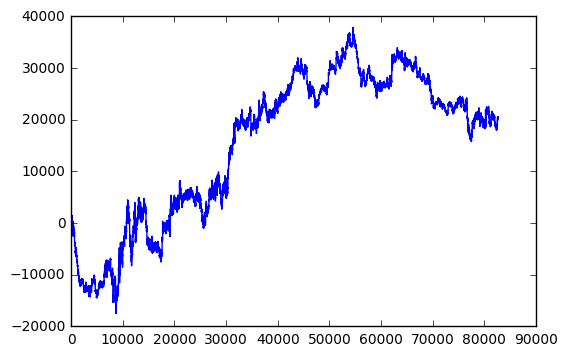

In [20]:
product = 'y'
data = pd.read_csv('/home/rui/blacksid/data/adjusted_5min/{}0.csv'.format(product.upper()))
candles = []
mins_5 = timedelta(seconds= 5*60)
for row in data.iterrows():
    if row[1].TotalVolumeTraded < 0.1:
        continue
    time2 = datetime.strptime(row[1].datetime, '%Y-%m-%d %H:%M:%S')
    time1 = time2 - mins_5
    start_time = int((time1 - datetime(1970, 1, 1)).total_seconds() * 1000)
    end_time = int((time2 - datetime(1970, 1, 1)).total_seconds() * 1000)
    adjust = row[1].adjust
    day_info = {}
    day_info['HighPrice'] = row[1].HighPx + adjust
    day_info['LowPrice'] = row[1].LowPx + adjust
    day_info['OpenPrice'] = row[1].OpeningPx + adjust
    day_info['ClosePrice'] = row[1].ClosingPx + adjust
    day_info['Volume'] = row[1].TotalVolumeTraded
    day_info['SettlePrice'] = row[1].TotalTurnover/row[1].TotalVolumeTraded + adjust   # vwap
    day_info['Position'] = 0
    day_info['LastPosition'] = 0
    temp_candle = Candle(day_info, start_time, end_time)
    candles.append(temp_candle)
param = {'ma1':10, 'ma2':100, 'filter1':50, 'filter2':100, 'atr_stop_loss': 10, 'alpha': 0.07, 'hands': 1}
cuAccount = MACross(product,param)
for i in range(len(candles)-1):
    cuAccount.on_candle(candles[i])
print cuAccount.pnl_history[-1]
plt.plot(cuAccount.pnl_history)

# cs: 16000

9384.5


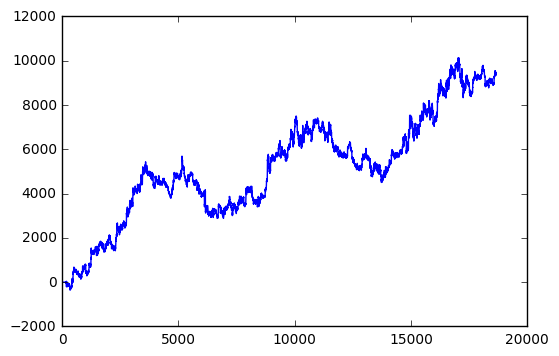

In [21]:
product = 'cs'
data = pd.read_csv('/home/rui/blacksid/data/adjusted_5min/{}0.csv'.format(product.upper()))
candles = []
mins_5 = timedelta(seconds= 5*60)
for row in data.iterrows():
    if row[1].TotalVolumeTraded < 0.1:
        continue
    time2 = datetime.strptime(row[1].datetime, '%Y-%m-%d %H:%M:%S')
    time1 = time2 - mins_5
    start_time = int((time1 - datetime(1970, 1, 1)).total_seconds() * 1000)
    end_time = int((time2 - datetime(1970, 1, 1)).total_seconds() * 1000)
    adjust = row[1].adjust
    day_info = {}
    day_info['HighPrice'] = row[1].HighPx + adjust
    day_info['LowPrice'] = row[1].LowPx + adjust
    day_info['OpenPrice'] = row[1].OpeningPx + adjust
    day_info['ClosePrice'] = row[1].ClosingPx + adjust
    day_info['Volume'] = row[1].TotalVolumeTraded
    day_info['SettlePrice'] = row[1].TotalTurnover/row[1].TotalVolumeTraded + adjust   # vwap
    day_info['Position'] = 0
    day_info['LastPosition'] = 0
    temp_candle = Candle(day_info, start_time, end_time)
    candles.append(temp_candle)
param = {'ma1':10, 'ma2':100, 'filter1':50, 'filter2':100, 'atr_stop_loss': 10, 'alpha': 0.07, 'hands': 1}
cuAccount = MACross(product,param)
for i in range(len(candles)-1):
    cuAccount.on_candle(candles[i])
print cuAccount.pnl_history[-1]
plt.plot(cuAccount.pnl_history)

# if: 1000000

577312.7961


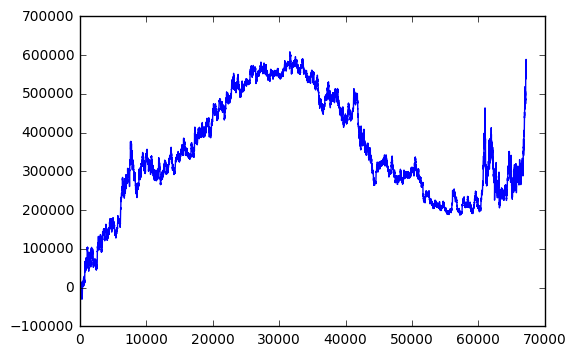

In [22]:
product = 'if'
data = pd.read_csv('/home/rui/blacksid/data/adjusted_5min/{}0.csv'.format(product.upper()))
candles = []
mins_5 = timedelta(seconds= 5*60)
for row in data.iterrows():
    if row[1].TotalVolumeTraded < 0.1:
        continue
    time2 = datetime.strptime(row[1].datetime, '%Y-%m-%d %H:%M:%S')
    time1 = time2 - mins_5
    start_time = int((time1 - datetime(1970, 1, 1)).total_seconds() * 1000)
    end_time = int((time2 - datetime(1970, 1, 1)).total_seconds() * 1000)
    adjust = row[1].adjust
    day_info = {}
    day_info['HighPrice'] = row[1].HighPx + adjust
    day_info['LowPrice'] = row[1].LowPx + adjust
    day_info['OpenPrice'] = row[1].OpeningPx + adjust
    day_info['ClosePrice'] = row[1].ClosingPx + adjust
    day_info['Volume'] = row[1].TotalVolumeTraded
    day_info['SettlePrice'] = row[1].TotalTurnover/row[1].TotalVolumeTraded + adjust   # vwap
    day_info['Position'] = 0
    day_info['LastPosition'] = 0
    temp_candle = Candle(day_info, start_time, end_time)
    candles.append(temp_candle)
param = {'ma1':10, 'ma2':100, 'filter1':50, 'filter2':100, 'atr_stop_loss': 10, 'alpha': 0.07, 'hands': 1}
cuAccount = MACross(product,param)
for i in range(len(candles)-1):
    cuAccount.on_candle(candles[i])
print cuAccount.pnl_history[-1]
plt.plot(cuAccount.pnl_history)

# al: 60000

19197.0


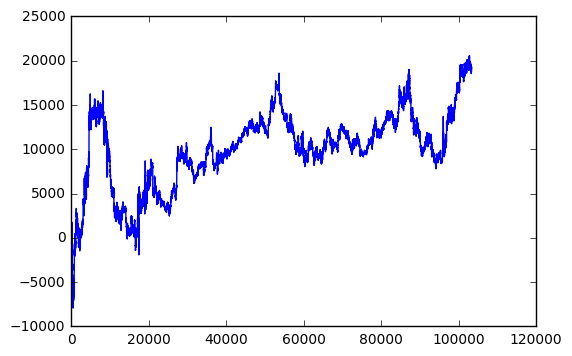

In [23]:
product = 'al'
data = pd.read_csv('/home/rui/blacksid/data/adjusted_5min/{}0.csv'.format(product.upper()))
candles = []
mins_5 = timedelta(seconds= 5*60)
for row in data.iterrows():
    if row[1].TotalVolumeTraded < 0.1:
        continue
    time2 = datetime.strptime(row[1].datetime, '%Y-%m-%d %H:%M:%S')
    time1 = time2 - mins_5
    start_time = int((time1 - datetime(1970, 1, 1)).total_seconds() * 1000)
    end_time = int((time2 - datetime(1970, 1, 1)).total_seconds() * 1000)
    adjust = row[1].adjust
    day_info = {}
    day_info['HighPrice'] = row[1].HighPx + adjust
    day_info['LowPrice'] = row[1].LowPx + adjust
    day_info['OpenPrice'] = row[1].OpeningPx + adjust
    day_info['ClosePrice'] = row[1].ClosingPx + adjust
    day_info['Volume'] = row[1].TotalVolumeTraded
    day_info['SettlePrice'] = row[1].TotalTurnover/row[1].TotalVolumeTraded + adjust   # vwap
    day_info['Position'] = 0
    day_info['LastPosition'] = 0
    temp_candle = Candle(day_info, start_time, end_time)
    candles.append(temp_candle)
param = {'ma1':10, 'ma2':100, 'filter1':50, 'filter2':100, 'atr_stop_loss': 10, 'alpha': 0.07, 'hands': 1}
cuAccount = MACross(product,param)
for i in range(len(candles)-1):
    cuAccount.on_candle(candles[i])
print cuAccount.pnl_history[-1]
plt.plot(cuAccount.pnl_history)

# rb :30000

46591.80728


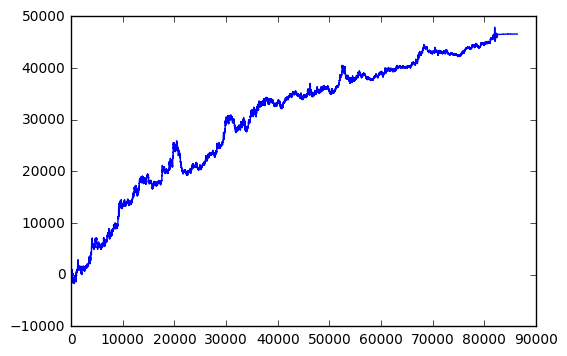

In [27]:
product = 'rb'
data = pd.read_csv('/home/rui/blacksid/data/adjusted_5min/{}0.csv'.format(product.upper()))
candles = []
mins_5 = timedelta(seconds= 5*60)
for row in data.iterrows():
    if row[1].TotalVolumeTraded < 0.1:
        continue
    time2 = datetime.strptime(row[1].datetime, '%Y-%m-%d %H:%M:%S')
    time1 = time2 - mins_5
    start_time = int((time1 - datetime(1970, 1, 1)).total_seconds() * 1000)
    end_time = int((time2 - datetime(1970, 1, 1)).total_seconds() * 1000)
    adjust = row[1].adjust
    day_info = {}
    day_info['HighPrice'] = row[1].HighPx + adjust
    day_info['LowPrice'] = row[1].LowPx + adjust
    day_info['OpenPrice'] = row[1].OpeningPx + adjust
    day_info['ClosePrice'] = row[1].ClosingPx + adjust
    day_info['Volume'] = row[1].TotalVolumeTraded
    day_info['SettlePrice'] = row[1].TotalTurnover/row[1].TotalVolumeTraded + adjust   # vwap
    day_info['Position'] = 0
    day_info['LastPosition'] = 0
    temp_candle = Candle(day_info, start_time, end_time)
    candles.append(temp_candle)
param = {'ma1':10, 'ma2':100, 'filter1':50, 'filter2':100, 'atr_stop_loss': 10, 'alpha': 0.07, 'hands': 1}
cuAccount = MACross(product,param)
for i in range(len(candles)-1):
    cuAccount.on_candle(candles[i])
print cuAccount.pnl_history[-1]
plt.plot(cuAccount.pnl_history)